In [64]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px


In [33]:
df= pd.read_csv("/content/drive/MyDrive/Analysis data/ramen-ratings.csv")

In [34]:
df.head()#reviewing the data

,Review #,Brand,Variety,Style,Country,Stars,Top Ten
0,2580,New Touch,T's Restaurant Tantanmen,Cup,Japan,3.75,NaN
1,2579,Just Way,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,Pack,Taiwan,1,NaN
2,2578,Nissin,Cup Noodles Chicken Vegetable,Cup,USA,2.25,NaN
3,2577,Wei Lih,GGE Ramen Snack Tomato Flavor,Pack,Taiwan,2.75,NaN
4,2576,Ching's Secret,Singapore Curry,Pack,India,3.75,NaN


In [35]:
df['Prize_status']= df['Top Ten'].apply(lambda x: 'Prized' if pd.notnull(x) else  'Not Prized' ) #making easier to check which of the restaurants have won a prize
df.head()

,Review #,Brand,Variety,Style,Country,Stars,Top Ten,Prize_status
0,2580,New Touch,T's Restaurant Tantanmen,Cup,Japan,3.75,NaN,Not Prized
1,2579,Just Way,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,Pack,Taiwan,1,NaN,Not Prized
2,2578,Nissin,Cup Noodles Chicken Vegetable,Cup,USA,2.25,NaN,Not Prized
3,2577,Wei Lih,GGE Ramen Snack Tomato Flavor,Pack,Taiwan,2.75,NaN,Not Prized
4,2576,Ching's Secret,Singapore Curry,Pack,India,3.75,NaN,Not Prized


In [36]:
df.duplicated().sum()# checking for duplicates

0

In [37]:
df.shape

(2580, 8)

In [38]:
df['Variety'].value_counts()
df['Variety'].nunique()

2413

In [39]:
df['Brand'].nunique()#last 3 lines aim to check how many unique values the columns Brand and Variety have.

355

In [40]:
df['Year']= df['Top Ten'].str.extract(r'(\d{4})')  #here we use the top ten to extract the year a prize was won
df.info()#although I have already checked the data in the table it's nice to check the values and type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2580 entries, 0 to 2579
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Review #      2580 non-null   int64 
 1   Brand         2580 non-null   object
 2   Variety       2580 non-null   object
 3   Style         2578 non-null   object
 4   Country       2580 non-null   object
 5   Stars         2580 non-null   object
 6   Top Ten       41 non-null     object
 7   Prize_status  2580 non-null   object
 8   Year          37 non-null     object
dtypes: int64(1), object(8)
memory usage: 181.5+ KB


In [41]:
df.describe(include= 'object') #this gives a summary of non numeric data

,Brand,Variety,Style,Country,Stars,Top Ten,Prize_status,Year
count,2580,2580,2578,2580,2580,41,2580,37
unique,355,2413,7,38,51,38,2,5
top,Nissin,Beef,Pack,Japan,4,\n,Not Prized,2012
freq,381,7,1531,352,384,4,2539,9


In the upper table we have some important information, for example there are 51 different values for the stars count, 38 countries that have participated and only 7 styles of ramen. Variety and brand are more information about the place in which the ramen was made, as in what restaurant.

In [42]:
df.columns[np.sum(df.isnull())== 0] #this line shows which of the columns have no missing numbers

Index(['Review #', 'Brand', 'Variety', 'Country', 'Stars', 'Prize_status'], dtype='object')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Japan'),
  Text(1, 0, 'USA'),
  Text(2, 0, 'South Korea'),
  Text(3, 0, 'Taiwan'),
  Text(4, 0, 'Thailand'),
  Text(5, 0, 'China'),
  Text(6, 0, 'Malaysia'),
  Text(7, 0, 'Hong Kong'),
  Text(8, 0, 'Indonesia'),
  Text(9, 0, 'Singapore')])

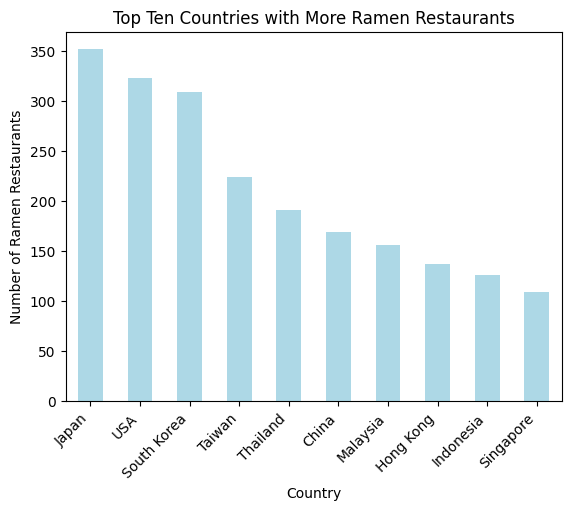

In [43]:
most_ramen_shops= df.Country.value_counts()[:10] #creates a list of the 10 countries with the biggest number of ramen restaurants.
most_ramen_shops.plot(kind='bar', color='lightblue')

# Customize the plot
plt.title('Top Ten Countries with More Ramen Restaurants')
plt.xlabel('Country')
plt.ylabel('Number of Ramen Restaurants')

# Rotate x-axis labels at a 45-degree angle
plt.xticks(rotation=45, ha='right')



In [44]:
df['Stars'] = df['Stars'].str.replace('[^\d.]', '', regex=True) #this eliminates all the non numeric data in the stars column



In [45]:
# Convert the cleaned "Stars" column to numeric values
df['Stars'] = pd.to_numeric(df['Stars'], errors='coerce') 
style_avg_stars= df.groupby('Style')['Stars'].mean() #this creates a new variable with the average rating for each style
avg_style_df = pd.DataFrame({'style': style_avg_stars.index, 'Average Stars': style_avg_stars.values})
avg_style_df = avg_style_df.sort_values('Average Stars', ascending= False)
avg_style_df

,style,Average Stars
0,Bar,5.000000
2,Box,4.291667
5,Pack,3.700458
1,Bowl,3.670686
6,Tray,3.545139
3,Can,3.500000
4,Cup,3.498500


In [46]:
#this creates a new variable with the average rating for each country
country_avg_stars= df.groupby('Country')['Stars'].mean() 
#this line will create a index for the new data frame
avg_country_df= pd.DataFrame(country_avg_stars).reset_index() 
avg_country_df.columns= ['Country','Average Stars']
avg_country_df

,Country,Average Stars
0,Australia,3.138636
1,Bangladesh,3.714286
2,Brazil,4.350000
3,Cambodia,4.200000
4,Canada,2.243902
5,China,3.421893
6,Colombia,3.291667
7,Dubai,3.583333
8,Estonia,3.500000
9,Fiji,3.875000


In [47]:
sorted_avg_country = avg_country_df.sort_values(by='Average Stars', ascending=False) #sorting the countries by they stars mean
top_countries= sorted_avg_country.head(5)
bottom_countries= sorted_avg_country.tail(5)
# we choose the best 5 and worst 5 for the graph and place them in one variable
graph_countries= pd.concat([top_countries,bottom_countries])
graph_countries.set_index('Country', inplace = True)
graph_countries

,Average Stars
Country,
Brazil,4.350000
Sarawak,4.333333
Cambodia,4.200000
Malaysia,4.154194
Singapore,4.126147
Pakistan,3.000000
UK,2.997101
Netherlands,2.483333
Canada,2.243902


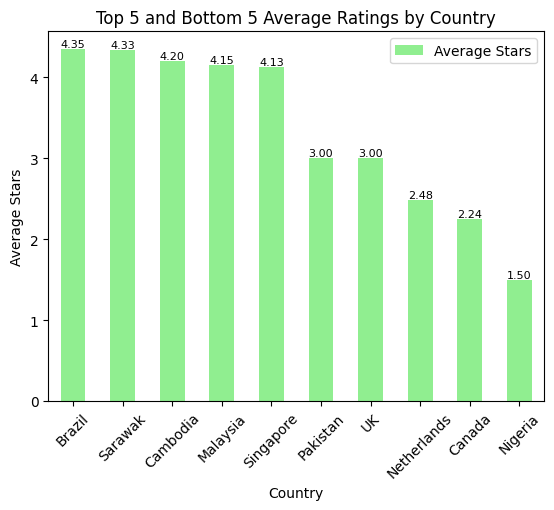

In [48]:
ax = graph_countries.plot(kind='bar', color='lightgreen')

# Add labels to the bars
for i, value in enumerate(graph_countries['Average Stars']):
    ax.text(i, value, f'{value:.2f}', ha='center', va='bottom', color='black', fontsize=8)

# Customize the plot
plt.xlabel('Country')
plt.ylabel('Average Stars')
plt.title('Top 5 and Bottom 5 Average Ratings by Country')
plt.xticks(rotation=45)
plt.show()


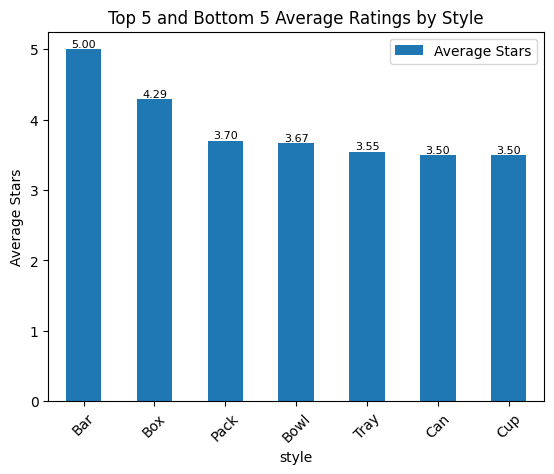

Maximum Stars by Style:
Style
Bar     5.0
Bowl    5.0
Box     5.0
Can     3.5
Cup     5.0
Pack    5.0
Tray    5.0
Name: Stars, dtype: float64

Minimum Stars by Style:
Style
Bar     5.0
Bowl    0.0
Box     1.5
Can     3.5
Cup     0.0
Pack    0.0
Tray    0.0
Name: Stars, dtype: float64


In [49]:
ax=avg_style_df.plot(x='style', y='Average Stars', kind='bar')

# Add labels to the bars
for i, value in enumerate(avg_style_df['Average Stars']):
    ax.text(i, value, f'{value:.2f}', ha='center', va='bottom', color='black', fontsize=8)

# Customize the plot
plt.xlabel('style')
plt.ylabel('Average Stars')
plt.title('Top 5 and Bottom 5 Average Ratings by Style')
plt.xticks(rotation=45)
plt.show()

# Checking the maximum and minimum scores of each style
max_stars_by_style = df.groupby('Style')['Stars'].max()
min_stars_by_style = df.groupby('Style')['Stars'].min()

print("Maximum Stars by Style:")
print(max_stars_by_style)

print("\nMinimum Stars by Style:")
print(min_stars_by_style)


Here we can confirm how the bar ramen is the best regarded of the group, followed by the box. The rest of types have a simmilar score. It's also interesting that some of the values have the same rating, for that reason the number of each style appearing should be checked.

In [50]:
style_counts = df['Style'].value_counts()

print("Style Counts:")
print(style_counts)

Style Counts:
Pack    1531
Bowl     481
Cup      450
Tray     108
Box        6
Can        1
Bar        1
Name: Style, dtype: int64


As expected the can and bar styles have only one appeance which makes them irreliable. We should consider then the bowl as the best style of ramen.Also it's important to see how the pack ramen is the most used, as it triples the cuantities than the second most used style.

In [51]:
# Creation of a variable that counts how many restaurants are in each country
countries_count = df['Country'].value_counts()

# Group values under 25 as "Other" and sum their counts
other_count = countries_count[countries_count < 45].sum()
countries_count = countries_count[countries_count >= 45]
countries_count.loc['Other'] = other_count


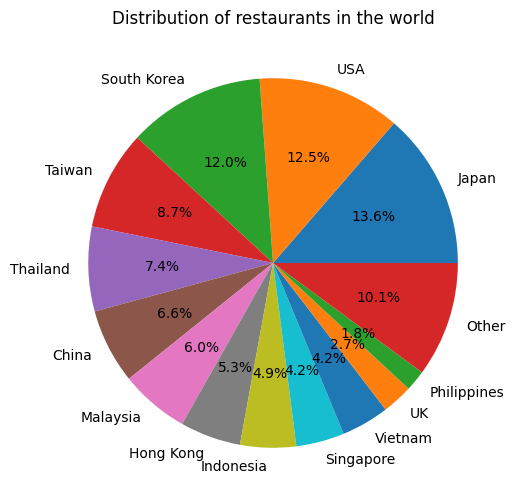

In [52]:
# Representation of the % of ramen studied by country
plt.figure(figsize=(10, 6))  # Set the figure size (optional)
countries_count.plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of restaurants in the world')
plt.ylabel('')  # Remove the y-axis label
plt.show()

In [53]:
df_country_prizes=  df[['Year', 'Country']].copy()
df_country_prizes.dropna(inplace= True)
df_country_prizes= df_country_prizes.sort_values('Year', ascending= True)
df_country_prizes=df_country_prizes.reset_index()
df_country_prizes = df_country_prizes.drop('index', axis=1)
df_country_prizes

,Year,Country
0,2012,Japan
1,2012,Indonesia
2,2012,Indonesia
3,2012,Hong Kong
4,2012,Japan
5,2012,Japan
6,2012,Indonesia
7,2012,South Korea
8,2012,Singapore
9,2013,Singapore


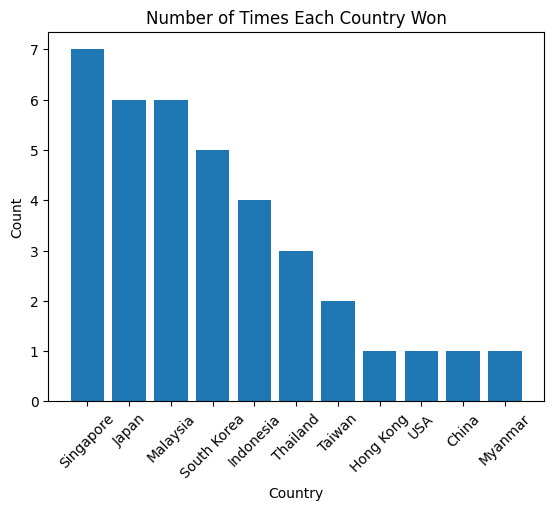

In [71]:
# Calculate the count of each country
country_counts = df_country_prizes['Country'].value_counts()

# Create the bar chart
plt.bar(country_counts.index, country_counts.values)

# Customize the plot
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Number of Times Each Country Won')
plt.xticks(rotation=45)

# Show the plot
plt.show()

Surprisingly the although Japan and USA were the 2 that have the most restaurants is Singapore the one who has won the most number of prizes.

In [68]:
#Char bars of the prizes won by each contry year by year
color_mapping = {}
unique_countries = df_country_prizes['Country'].unique()

for i, country in enumerate(unique_countries):
    color_mapping[country] = px.colors.qualitative.Plotly[i % len(px.colors.qualitative.Plotly)]

for year in df_country_prizes['Year'].unique():
    data_year = grouped_data[year]
    fig = px.bar(data_year, x=data_year.index, y=data_year.values, title=f'Prizes won by each country in {year}', color=data_year.index, color_discrete_map=color_mapping)
    fig.update_layout(yaxis_title='Prizes Won')
    fig.show()


